# IRIS - Connection II
---
![Add layer](https://github.com/DrKAI/image/blob/main/Add%20Layer.png?raw=true)

In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras

from sklearn.datasets import load_iris

## 데이터 불러오기
* iris.feature_names를 이용하여 판다스 데이터 프레임 만들기!

In [2]:
iris = load_iris()

x = iris.data
y = iris.target

In [3]:
df_x = pd.DataFrame(x, columns=iris.feature_names)
df_x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


- 꽃받침이면 꽃받침끼리, 꽃잎이면 꽃잎끼리 비교하자. 
- 어떻게 부위 상관없이 길이 너비를 따지냐?
- 이게 어떻게 보면 사람 관점에서 합리적임

## train set, test set 구분하기

In [4]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(df_x, y, test_size=0.2, random_state=2023)

In [13]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((120, 4), (120,), (30, 4), (30,))

In [14]:
y_train

array([0, 0, 0, 2, 1, 2, 0, 1, 2, 0, 1, 2, 1, 1, 1, 2, 1, 1, 1, 0, 0, 2,
       0, 0, 1, 2, 1, 1, 0, 0, 1, 2, 2, 0, 1, 2, 1, 1, 1, 2, 0, 1, 2, 1,
       2, 2, 1, 0, 1, 1, 0, 2, 2, 0, 1, 1, 0, 2, 0, 1, 1, 2, 0, 0, 0, 2,
       2, 0, 0, 1, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0,
       0, 2, 2, 1, 1, 2, 0, 1, 1, 2, 2, 0, 1, 2, 2, 2, 0, 0, 1, 2, 0, 1,
       2, 0, 1, 0, 2, 1, 2, 0, 0, 1])

## **sepal끼리, petal끼리**

In [15]:
df_x.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [33]:
x_train_sepal = x_train.loc[:, ['sepal length (cm)', 'sepal width (cm)']]
x_train_petal = x_train.loc[:, ['petal length (cm)', 'petal width (cm)']]

x_test_se = x_test.loc[:, ['sepal length (cm)', 'sepal width (cm)']]
x_test_pe = x_test.loc[:, ['sepal length (cm)', 'sepal width (cm)']]


In [17]:
x_train_sepal.shape, x_train_petal.shape

((120, 2), (120, 2))

In [18]:
x_train_sepal.head()

,sepal length (cm),sepal width (cm)
9,4.9,3.1
38,4.4,3.0
18,5.7,3.8
119,6.0,2.2
98,5.1,2.5


In [19]:
x_train_petal.head()

,petal length (cm),petal width (cm)
9,1.5,0.1
38,1.3,0.2
18,1.7,0.3
119,5.0,1.5
98,3.0,1.1


## One-hot Encoding

In [20]:
from tensorflow.keras.utils import to_categorical

In [34]:
class_practice = len(set(y_train))
class_practice

3

In [22]:
class_n = len(np.unique(y_train))

In [23]:
train_y = to_categorical(y_train, class_n)
test_y = to_categorical(y_test, class_n)

In [28]:
train_y.shape

(120, 3)

In [35]:
x_train_sepal.shape, x_train_petal.shape, train_y.shape

((120, 2), (120, 2), (120, 3))

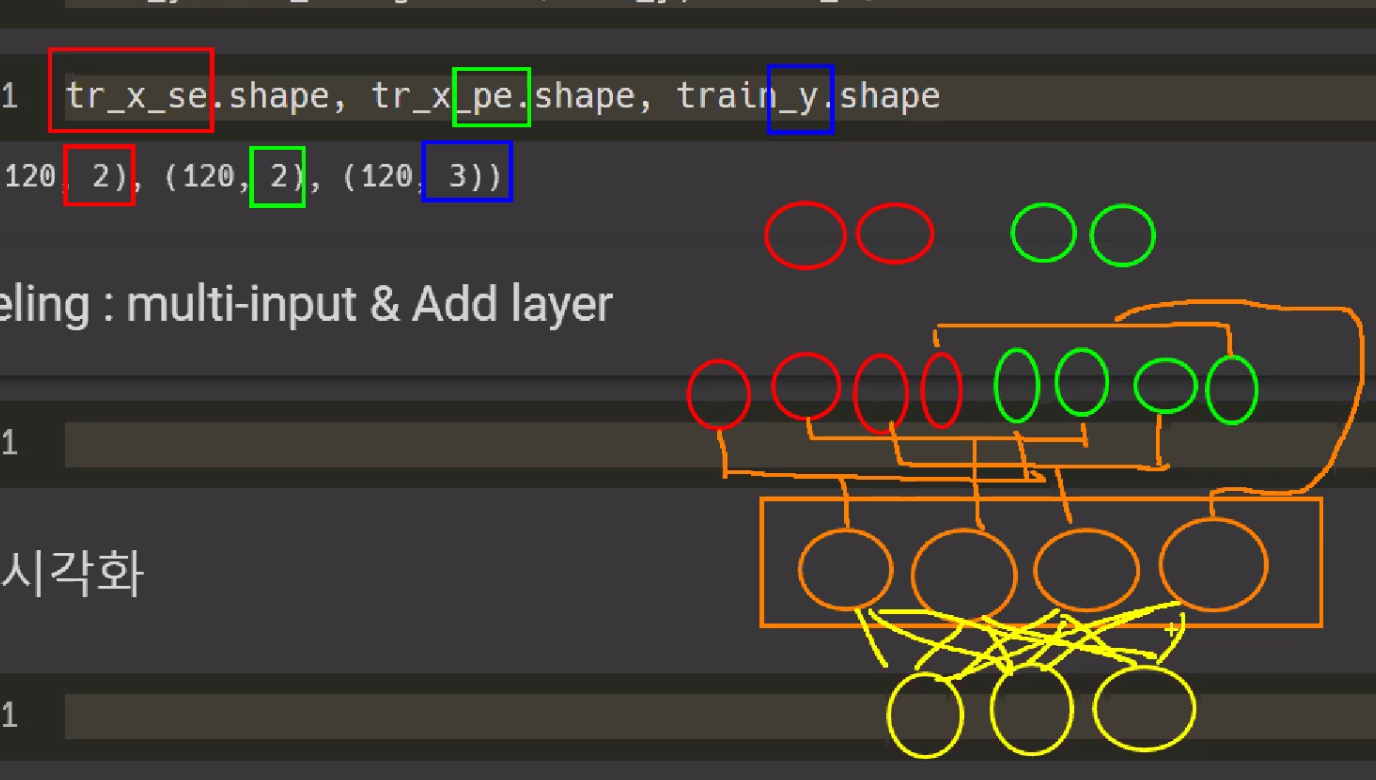

## Modeling : multi-input & Add layer

In [31]:
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Model

from tensorflow.keras.layers import Input, Dense, Add
from tensorflow.keras.activations import relu, softmax

from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [39]:
### Functional API
# 1. 세션 클리어
clear_session()

# 2. 레이어 사슬처럼 엮기 : input 2개!
il_se = Input( shape=(2,) ) # 어떻게 엮는지가 훨씬 더 중요
il_pe = Input( shape=(2,) )

hl_se = Dense(2, activation='relu')(il_se)
hl_pe = Dense(2, activation='relu')(il_pe)

add_1 = Add()([hl_se, hl_pe]) # 왼쪽 노드 두개가 렝스 노드 두개고 오른쪽이 위드스에서 추출된 노드 두개를 의미함
ol = Dense(3, activation='softmax')(add_1)

# 3. 모델 시작과 끝 지정
model = Model([il_se, il_pe], ol)

# 4. 모델 컴파일
model.compile(loss='categorical_crossentropy', metrics=['accuracy'],
              optimizer='adam')

# 요약
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 2)            6           ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 2)            6           ['input_2[0][0]']                
                                                                                              

## 모델 시각화

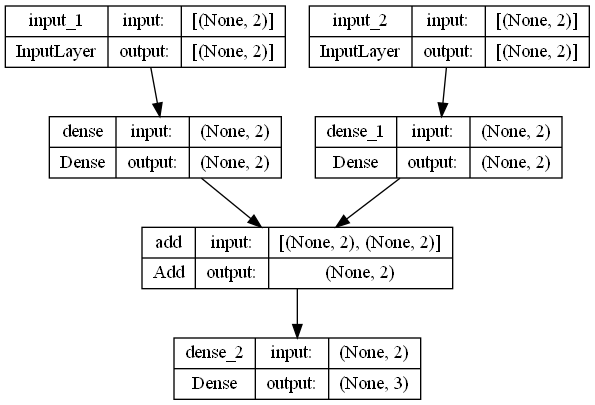

In [40]:
plot_model(model, show_shapes=True)

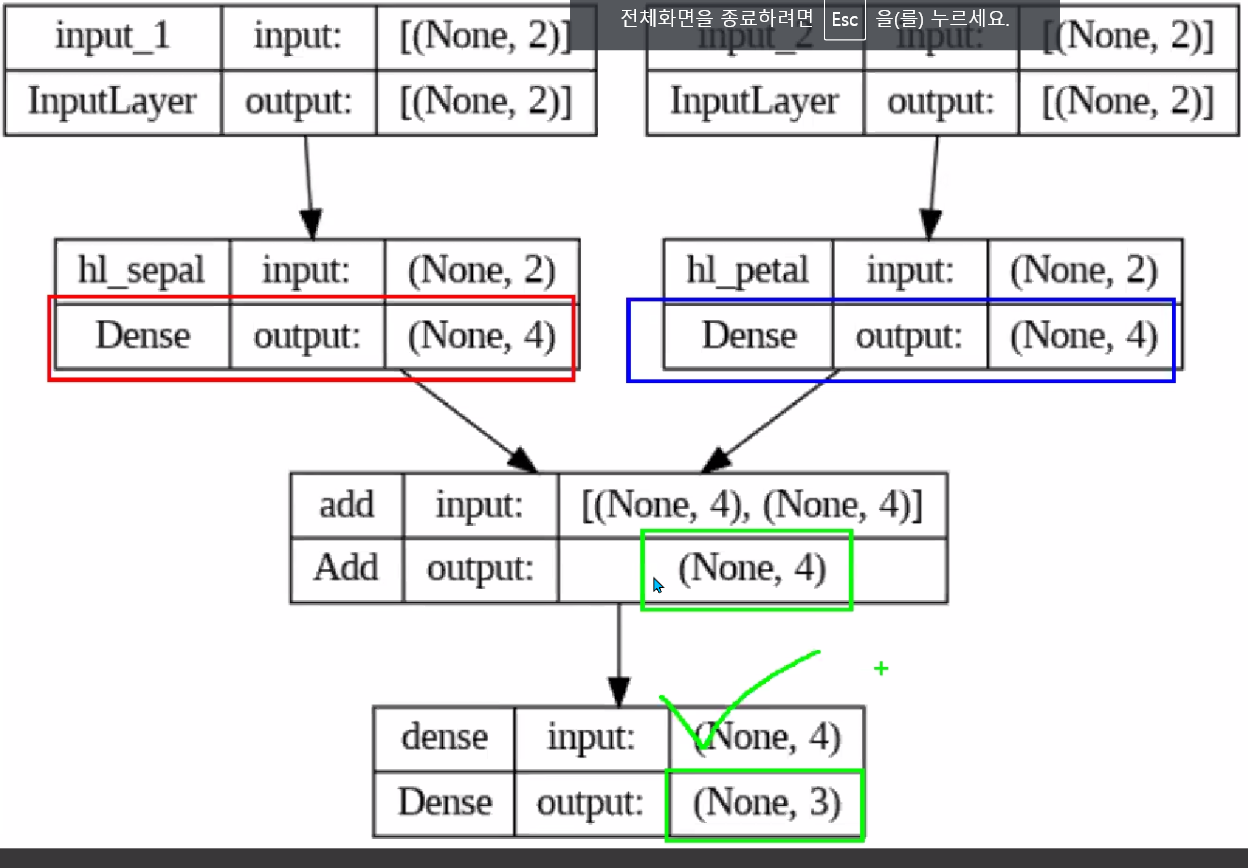

## 학습 시켜보기!

In [37]:
es = EarlyStopping(monitor='val_loss',    # 관측 대상
                   min_delta=0,           # 임계값, 관측 대상이 임계값만큼 변하지 않는다면 patience 1 증가
                   patience=30,           # 관측 대상 성능이 개선되지 않을 때 몇 번 더 지켜볼래
                   verbose=1,
                   restore_best_weights=True) # 최적의 epoch 가중치를 모델에 적용

In [41]:
model.fit([x_train_sepal, x_train_petal], train_y, validation_split=0.2, epochs=10000, verbose=1, callbacks=[es])

Epoch 1/10000
3/3 [==============================] - 2s 298ms/step - loss: 2.7916 - accuracy: 0.5938 - val_loss: 2.8176 - val_accuracy: 0.5833
Epoch 2/10000
3/3 [==============================] - 0s 34ms/step - loss: 2.7536 - accuracy: 0.6042 - val_loss: 2.7769 - val_accuracy: 0.5833
Epoch 3/10000
3/3 [==============================] - 0s 36ms/step - loss: 2.7161 - accuracy: 0.6042 - val_loss: 2.7366 - val_accuracy: 0.5833
Epoch 4/10000
3/3 [==============================] - 0s 36ms/step - loss: 2.6728 - accuracy: 0.6042 - val_loss: 2.6985 - val_accuracy: 0.5833
Epoch 5/10000
3/3 [==============================] - 0s 37ms/step - loss: 2.6387 - accuracy: 0.6042 - val_loss: 2.6600 - val_accuracy: 0.5833
Epoch 6/10000
3/3 [==============================] - 0s 42ms/step - loss: 2.5999 - accuracy: 0.6042 - val_loss: 2.6224 - val_accuracy: 0.5833
Epoch 7/10000
3/3 [==============================] - 0s 38ms/step - loss: 2.5645 - accuracy: 0.6042 - val_loss: 2.5851 - val_accuracy: 0.5833
Epoch

In [42]:
y_pred = model.predict([x_train_sepal, x_train_petal])

4/4 [==============================] - 0s 2ms/step


In [43]:
y_pred[:5]

array([[9.9999565e-01, 4.2776046e-06, 5.6623894e-19],
       [9.9999362e-01, 6.3722205e-06, 2.5937228e-18],
       [9.9998039e-01, 1.9492543e-05, 2.4937550e-18],
       [5.2556466e-11, 2.1256495e-01, 7.8743505e-01],
       [6.2714570e-04, 9.9934584e-01, 2.7002736e-05]], dtype=float32)

In [44]:
y_test[:5]

array([2, 1, 1, 2, 1])